# Regressie - intro

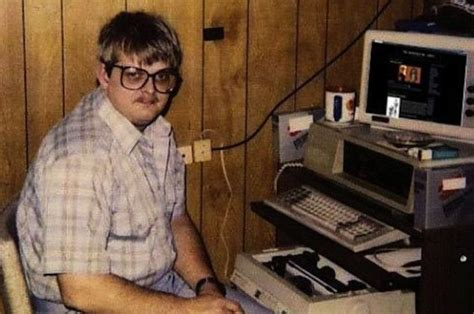

## Install

In [1]:
!pip3 install numpy
!pip3 install scipy

## Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [64]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    arr = np.array([1, 2, 3, 4, 5, 6, 7])

print(arr[1:5]) 
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [89]:
# y = ax + b

# offset = 25,000
# price_per_m2 = 5,000

# p = 5,000 * opp + 25,000

In deze stap ga je datapunten genereren met Numpy

1. Eerst een range van x-waarden bepalen vanaf 50 en tot boven de 75, bijvoorbeeld 200

2. bereken alle y-waardes adhv de x-waardes

3. voeg noise toe aan de data, anders heeft het model niets te leren. Daar heeft numpy een functie voor. Je wilt dat die noise normaal verdeeld is.

4. plot graph

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200]

[ 275000  280000  285000  290000  295000  300000  305000  310000  315000
  320000  325000  330000  335000  340000  345000  350000  355000  360000
  365000  370000  375000  380000  385000  390000  395000  400000  405000
  410000  415000  420000  425000  430000  435000  440000  445000  450000
  455000  460000  465000  470000  475000  480000  485000  490000  495000
  500000  505000  51

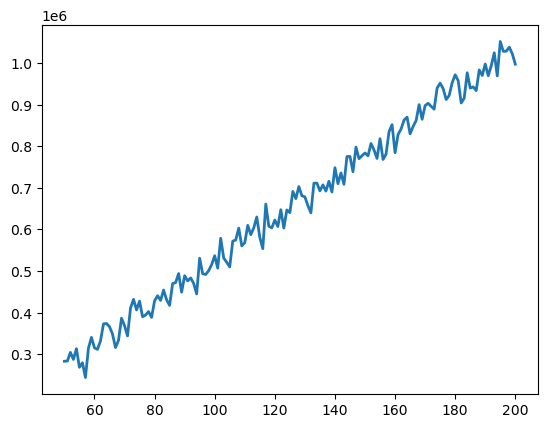

In [88]:
# 1 
opp = np.arange(50, 201)
print(opp)
print()

# 2
p = 25000 + opp * 5000
print(p)
print()

# 3
# p_noise is p with noise

p_noise = np.random.normal(p,23456,151).astype(int)
print(p_noise)

# 4
plot_graph(opp,p_noise)


### Stap 2: Bekijk interval [50, 75] m2

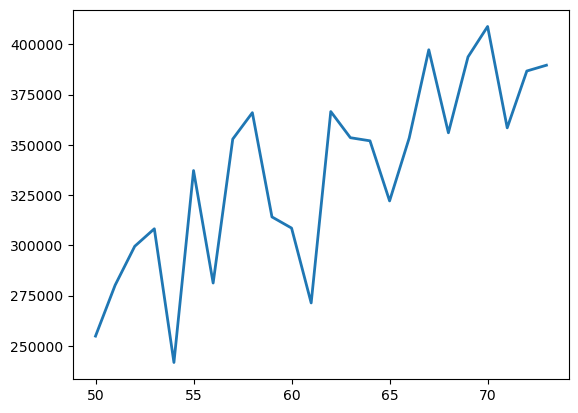

In [77]:
# interval is een slice van een bestaand numpy array, dus hier een slice van twee arrays
# arr = np.array([1, 2, 3, 4, 5, 6, 7])
# arr[1:5]

opp_50_75 = opp[0: 24]
p_noise_50_75 = p_noise[0: 24]
plot_graph(opp_50_75,p_noise_50_75)

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

(array([ 5255.356539  , 12418.82285163]), array([[ 7.62138953e+05, -4.68715576e+07],
       [-4.68715576e+07,  2.91912071e+09]]))


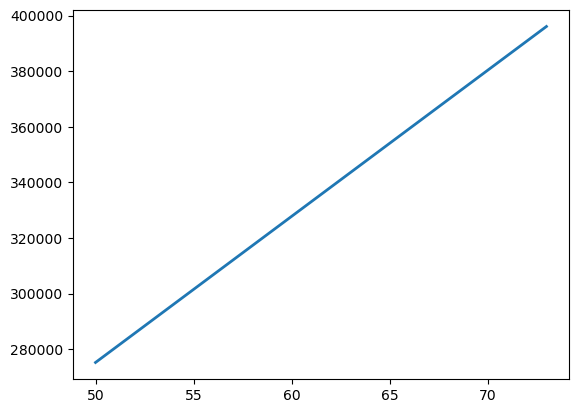

In [120]:
# Define our model
# scipy.optimize.curve_fit(f, xdata, ydata) vraagt om een functie f, een numpy array x en een numpy array y

# def f(x, a, b):
#     y = a * x + b
#     return y

def model(x, a, b):
    return a * x + b

# alternatief a + nparray(x * b) om array af te dwingen als de input dat nog niet is.


# Use scipy optimize package
# scipy.optimize.curve_fit(model, xdata, ydata) waarbij het model is callable, dus een functie model

# Create fit

p_fit = cp.optimize.curve_fit(model, opp_50_75, p_noise_50_75)
# fit geeft 2 arrays waarbij de 1e array de a en de b geeft en de 2e array additionele info als variantie e.d.)
print(p_fit)

# alternatief: p,var = waarbij de output van twee arrays in twee variabelen wordt geplaatst.
# alternatief 2: p, _ = waarbij _ een var is die je niet meer gebruikt. Want var gebruik je toch niet meer.
# dan wel [0][0] vervangen door [0] bij het plotten

p_prediction = p_fit[0][0] * opp_50_75 + p_fit[0][1]

# Plot fit

plot_graph(opp_50_75, p_prediction)

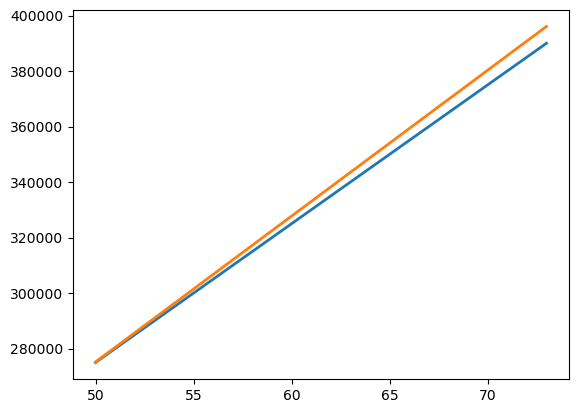

In [134]:
p_50_75 = p[0:24]

ax = plot_init()

plot_add(ax, opp_50_75, p_50_75)
plot_add(ax, opp_50_75, p_prediction)

plot_show()

### Stap 4: Extrapoleer

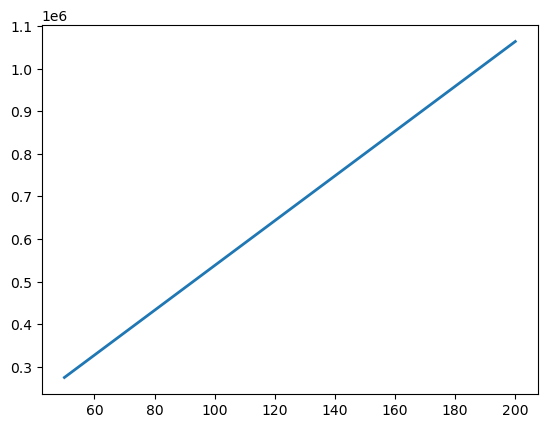

In [127]:
# Create fit

# Extrapoleer van het kleine interval naar de hele reeks
# p_fit blijft gelijk = cp.optimize.curve_fit(f, opp, p_noise)

# p_prediction doe je nu over de hele reeks, dus :
# Plot prediction for whole range
plot_graph(opp, p_fit[0][0] * opp + p_fit[0][1])

## Polynomiale verbanden

### Model

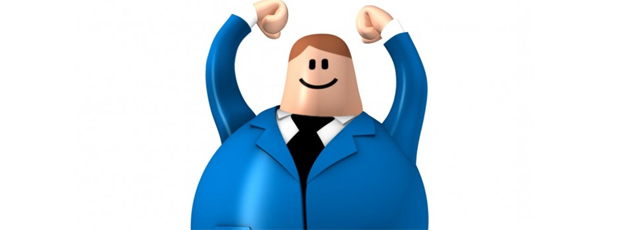

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [97]:
# radius = np.array
# mass_bolman = 1.03 * radius**3 + 12.4 + 8.7 + 3.2

In [ ]:
# y = d * x**3 + b + a + h

### Stap 2: Fit data

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[ 1.02911897 25.72684916]


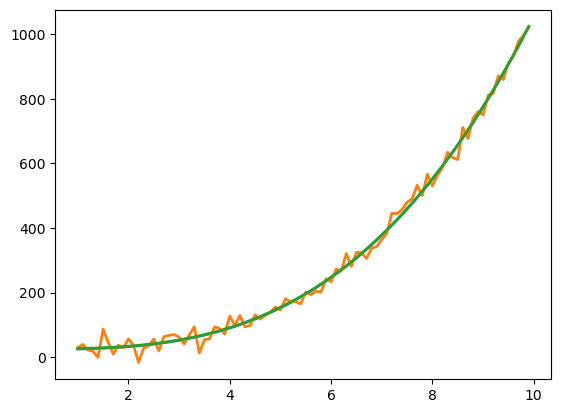

In [153]:
# Define our model

radius = np.arange(1, 10, 0.1)
mass_bolman = 1.03 * radius**3 + 12.4 + 8.7 + 3.2
print(radius)


mass_bolman_noise = np.random.normal(mass_bolman, 20)


# Use scipy optimize package
# scipy.optimize.curve_fit(f, xdata, ydata)

def model_poly(r, d, bah):
    return d * r**3 + bah

# Create fit

mass_bolman_fit, _ = cp.optimize.curve_fit(model_poly, radius, mass_bolman_noise)
print(mass_bolman_fit)

mass_bolman_prediction = mass_bolman_fit[0]*radius**3 + mass_bolman_fit[1]

# Plot fit
# plot_graph(radius, mass_bolman_prediction)

ax = plot_init()

plot_add(ax, radius, mass_bolman)
plot_add(ax, radius, mass_bolman_noise)
plot_add(ax, radius, mass_bolman_prediction)

plot_show()


## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861